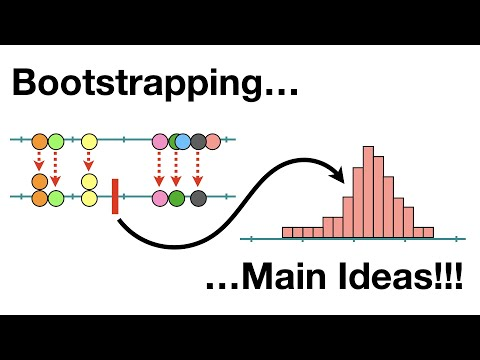

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

## Question 1

Although the "standard error of the mean" and the "standard deviation" are related, they represent two different concepts. The standard deviation is the measure of the spread of the original data values, and shows how individual data points behave in comparison to the mean value of the dataset. The standard error of mean estimates how accurate the sample mean represented the population mean. A smaller SEM means a higher accuracy and more precise estimation of the population mean.

ChatBot session link: https://chatgpt.com/share/66fe1bd2-5ac0-8007-b22f-8f736dae5635

Summary:

    Statistical Concepts:

    You asked about the difference between the standard deviation and the standard error of the mean (SEM).
    I explained that:
    - Standard deviation (SD) measures the spread or variability of individual data points in a dataset relative to the mean.
    - Standard error of the mean (SEM) quantifies the precision of the sample mean as an estimate of the true population mean, and is calculated by dividing the standard deviation by the square root of the sample size.
    - While SD reflects the variability of the data, SEM reflects how accurate the sample mean is as an estimate of the population mean.

## Question 6

1. The process of bootstrapping can be broken down into a few steps. First, from the original dataset, we randomly take a value and duplicate it to the bootstrapped dataset. In the process of drawing random values, data points that had been drawn before may be repeated; this is called sampling with replacement. We then let the computer repeat the same process for a certain amount of sample size we think is necessary, depending on the size of the original dataset. Once we have the collection of bootstrap samples, we can then calculate the standard error of the mean, as explained in question 1 earlier, and compare it to our original dataset. Lastly, conducting hypothesis testing, for example, using the confidence interval.
2. The main goal of performing bootstrapping is to estimate the sampling distribution of a dataset, and obtaining the theoretical distribution. Using the theoretical datas we got from simulation, we can then calculate standard errors to determine how accurate and reliable the original dataset is.
3. Since we have a sample of size n from the population, we can bootstrap the sample for perhaps one million times, while using sampling with replacement. Using the bootstrap sample, we can calculate the sample mean from all those trials, and compare it to my hypothesized guess of the average (mean) of population.

## Question 8

In [1]:
import pandas as pd
import numpy as np

# Sample data provided
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the difference between Final and Initial Health Scores
df['HealthScoreDiff'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Mean difference observed in the sample
mean_diff_observed = df['HealthScoreDiff'].mean()

# Bootstrapping
np.random.seed(42)  # For reproducibility
n_bootstrap = 10000  # Number of bootstrap samples
bootstrapped_means = []

# Bootstrapping process
for _ in range(n_bootstrap):
    # Resample with replacement
    boot_sample = df['HealthScoreDiff'].sample(frac=1, replace=True)
    # Calculate the mean difference for the resample
    bootstrapped_means.append(boot_sample.mean())

# Convert to a numpy array for further analysis
bootstrapped_means = np.array(bootstrapped_means)

# 95% Confidence Interval
ci_lower = np.percentile(bootstrapped_means, 2.5)
ci_upper = np.percentile(bootstrapped_means, 97.5)

# Print results
print(f"Observed Mean Difference: {mean_diff_observed}")
print(f"95% Confidence Interval: [{ci_lower}, {ci_upper}]")

Observed Mean Difference: 3.3
95% Confidence Interval: [0.9, 5.6]


The meaning of a null hypothesis of "no effect" in this context is simply claiming that the vaccine had no impact on the outcomes or differences between the initial and final health score, as the fluctuation could be caused by other factors. 

Using the given dataset, the dataframe was assigned to a variable, under three variables, PatientID, InitialHealthScore, and FinalHealthScore. The main purpose of this assignment is to figure out the pattern of the difference in health score from before to after, so a new column was created for the difference value. Before jumping into bootstrapping the original dataset, we can first analyze the mean from the real, obtained dataset, as a comparison to our final result after. When creating bootstrapping samples, other than coding it to repeat the drawing process, we also have to make use of the sampling with replacement to get the most realistic simulation. After getting the data from the bootstrapped samples, we can then analyze those data; one way is to calculate the confidence interval. By getting the 95% interval, we can further have a better estimate of the bootstrapped mean distribution, leaving out any significant outliers.

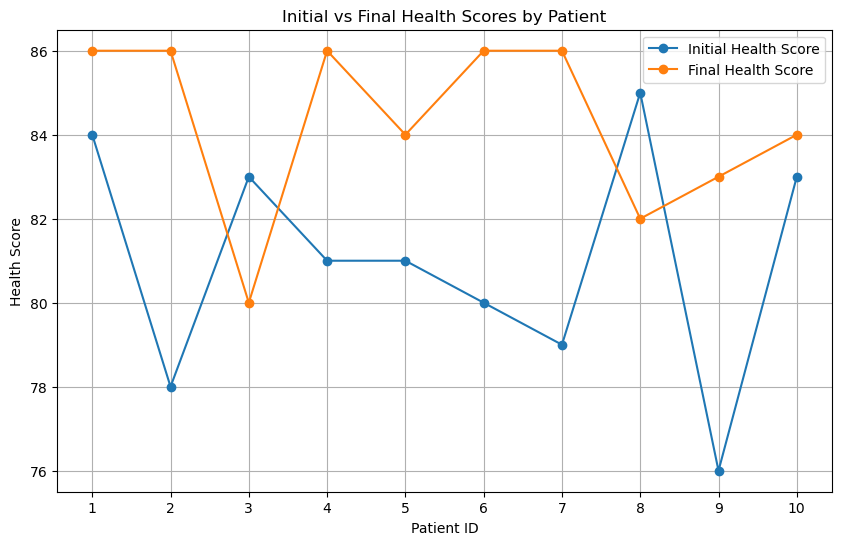

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data provided
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Visualizing the initial and final health scores for each patient
plt.figure(figsize=(10,6))
plt.plot(df['PatientID'], df['InitialHealthScore'], label='Initial Health Score', marker='o')
plt.plot(df['PatientID'], df['FinalHealthScore'], label='Final Health Score', marker='o')

# Adding labels, title, and legend
plt.title('Initial vs Final Health Scores by Patient')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.xticks(df['PatientID'])
plt.legend()

# Show the plot
plt.grid(True)
plt.show()